In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv(".\\datasets\\Startup_India.csv")

In [16]:
dataset.head(2)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,16534920,13689780,47178410,New Delhi,19226183
1,16259770,15137759,44389853,Bangalore,19179206


In [17]:
dataset.count()

RD_Spend           50
Administration     50
Marketing_Spend    50
State              50
Profit             50
dtype: int64

In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X

D:\Users\madhur\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Users\madhur\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+07,
        1.3689780e+07, 4.7178410e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+07,
        1.5137759e+07, 4.4389853e+07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+07,
        1.0114555e+07, 4.0793454e+07],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+07,
        1.1867185e+07, 3.8319962e+07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+07,
        9.1391770e+06, 3.6616842e+07],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+07,
        9.9814710e+06, 3.6286136e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+07,
        1.4719887e+07, 1.2771682e+07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+07,
        1.4553006e+07, 3.2387668e+07],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+07,
        1.4871895e+07, 3.1161329e+07],
       [1.0000000e+00, 0.0000000e+00,

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_predict = regressor.predict(X_test)

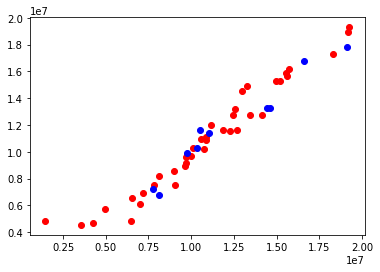

In [23]:
plt.scatter(y_train,regressor.predict(X_train), color='r')
plt.scatter(y_test,regressor.predict(X_test), color='b')
plt.show()

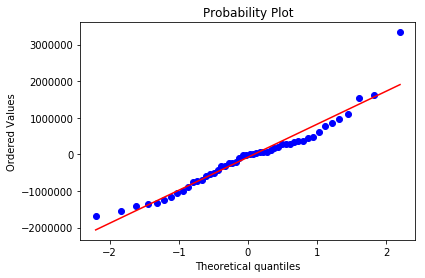

In [24]:
from scipy import stats as mystats
res = regressor.predict(X)- y
mystats.probplot(res,plot=plt)
plt.show()

In [26]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           2.76e-29
Time:                        10:16:26   Log-Likelihood:                -757.61
No. Observations:                  50   AIC:                             1523.
Df Residuals:                      46   BIC:                             1531.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.106e+06   1.12e+05     18.806      0.000    1.88e+06    2.33e+06
x1          2.106e+06   1.12e+05     18.806      0.000    1.88e+06    2.33e+06
x2          6.629e+05   1.92e+05      3.455      0.001    2.77e+05    1.05e+06
x3          7.793e+05   2.03e+05      3.847      0.000    3.72e+05    1.19e+06
x4          6.639e+05   1.96e+05      3.391      0.001     2.7e+05    1.06e+06
x5             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     1.24e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           2.76e-29
Time:                        10:16:37   Log-Likelihood:                -757.61
No. Observations:                  50   AIC:                             1523.
Df Residuals:                      46   BIC:                             1531.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.438e+06   1.52e+05     16.036      0.000    2.13e+06    2.74e+06
x1          2.438e+06   1.52e+05     16.036      0.000    2.13e+06    2.74e+06
x2          1.164e+05   3.38e+05      0.344      0.732   -5.64e+05    7.97e+05
x3           959.6864   3.31e+05      0.003      0.998   -6.66e+05    6.68e+05
x4             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     8.90e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.73e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           2.76e-29
Time:                        10:16:47   Log-Likelihood:                -757.61
No. Observations:                  50   AIC:                             1523.
Df Residuals:                      46   BIC:                             1531.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.875e+06   3.04e+05     16.036      0.000    4.26e+06    5.49e+06
x1          1.164e+05   3.38e+05      0.344      0.732   -5.64e+05    7.97e+05
x2           959.6865   3.31e+05      0.003      0.998   -6.66e+05    6.68e+05
x3             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     2.89e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     417.5
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.19e-30
Time:                        10:16:58   Log-Likelihood:                -757.61
No. Observations:                  50   AIC:                             1521.
Df Residuals:                      47   BIC:                             1527.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.875e+06   2.65e+05     18.377      0.000    4.34e+06    5.41e+06
x1          1.159e+05    2.9e+05      0.400      0.691   -4.67e+05    6.99e+05
x2             0.8530      0.030     28.691      0.000       0.793       0.913
==============================================================================
Omnibus:                       13.425   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.624
Skew:                          -0.907   Prob(JB):                     0.000149
Kurtosis:                       5.273   Cond. No.                     2.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Mon, 30 Mar 2020   Prob (F-statistic):              0.421
Time:                        10:17:10   Log-Likelihood:                -830.57
No. Observations:                  50   AIC:                             1665.
Df Residuals:                      48   BIC:                             1669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e+07   6.94e+05     15.689      0.000    9.49e+06    1.23e+07
x1          9.943e+05   1.23e+06      0.811      0.421   -1.47e+06    3.46e+06
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""